# Scicite pre-process

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import AutoTokenizer

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [2]:
import sys
parent_directory = os.path.abspath('..')
sys.path.append(parent_directory)

In [3]:
from utils.common import alloc_map, map_title_section, normalize_title_section, count_words

In [4]:
## scicite from (https://github.com/allenai/scicite/)
train_path_scicite = '../data/scicite/train.jsonl'
dev_path_scicite = '../data/scicite/dev.jsonl'
test_path_scicite = '../data/scicite/test.jsonl'
cite_worth_scicite= '../data/scicite/scaffolds/cite-worthiness-scaffold-train.jsonl'
sections_scicite = '../data/scicite/scaffolds/sections-scaffold-train.jsonl'

In [5]:
df_train= pd.read_json(path_or_buf=train_path_scicite, lines=True)
df_dev= pd.read_json(path_or_buf=dev_path_scicite, lines=True)
df_test= pd.read_json(path_or_buf=test_path_scicite, lines=True)
df_cite_worth = pd.read_json(path_or_buf=cite_worth_scicite, lines=True)
df_sections= pd.read_json(path_or_buf=sections_scicite, lines=True)

In [6]:
df_train['sectionName'] = df_train.sectionName.apply(normalize_title_section)
df_dev['sectionName'] = df_dev.sectionName.apply(normalize_title_section)
df_test['sectionName'] = df_test.sectionName.apply(normalize_title_section)

In [7]:
df_train.rename(columns={'sectionName':'section_name'}, inplace=True)
df_dev.rename(columns={'sectionName':'section_name'}, inplace=True)
df_test.rename(columns={'sectionName':'section_name'}, inplace=True)

In [8]:
df_train = df_train[['string', 'label', 'section_name']]
df_dev = df_dev[['string', 'label', 'section_name']]
df_test = df_test[['string', 'label', 'section_name']]

df_train.columns = ['text', 'intent', 'section_name']
df_dev.columns = ['text', 'intent', 'section_name']
df_test.columns = ['text', 'intent', 'section_name']

In [9]:
df_train['text_uncased'] = df_train.text.str.lower()
df_dev['text_uncased'] = df_dev.text.str.lower()
df_test['text_uncased'] = df_test.text.str.lower()

In [10]:
df_train['prompt'] = df_train.apply(lambda x: x.section_name + ". " + x.text, axis=1)
df_dev['prompt'] = df_dev.apply(lambda x: x.section_name + ". " + x.text, axis=1)
df_test['prompt'] = df_test.apply(lambda x: x.section_name + ". " + x.text, axis=1)

In [11]:
df_train.head(1)

,text,intent,section_name,text_uncased,prompt
0,"However, how frataxin interacts with the Fe-S ...",background,introduction,"however, how frataxin interacts with the fe-s ...","introduction. However, how frataxin interacts ..."


In [12]:
all_scicite = pd.concat([df_train, df_test, df_dev])

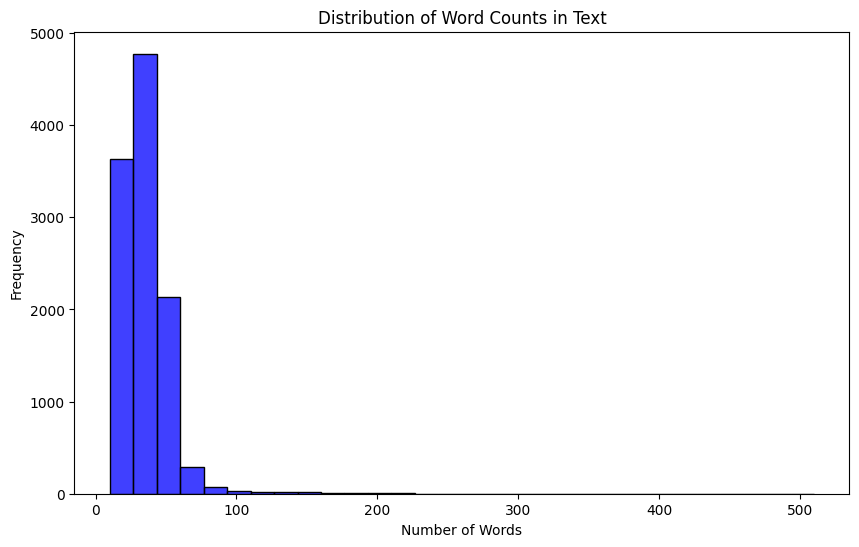

In [13]:
all_scicite['word_count'] = all_scicite['text'].apply(count_words)

plt.figure(figsize=(10, 6))
sns.histplot(all_scicite['word_count'], bins=30, kde=False, color='blue')

plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts in Text')

plt.show()

In [14]:
tokenizer = AutoTokenizer.from_pretrained('allenai/scibert_scivocab_uncased')

Could not locate the tokenizer configuration file, will try to use the model config instead.
loading configuration file config.json from cache at /home/davialvb/.cache/huggingface/hub/models--allenai--scibert_scivocab_uncased/snapshots/24f92d32b1bfb0bcaf9ab193ff3ad01e87732fc1/config.json
Model config BertConfig {
  "_name_or_path": "allenai/scibert_scivocab_uncased",
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.42.4",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 31090
}

loading file vocab.txt from cache at /home/davialvb/.cache/huggingface/hub/models--allenai--scibert_scivocab_uncased/s

In [18]:
all_scicite.head()

,text,intent,section_name,text_uncased,prompt,word_count,bert_token_cont
0,"However, how frataxin interacts with the Fe-S ...",background,introduction,"however, how frataxin interacts with the fe-s ...","introduction. However, how frataxin interacts ...",37,69
1,"In the study by Hickey et al. (2012), spikes w...",background,novel quantitative trait loci for seminal root...,"in the study by hickey et al. (2012), spikes w...",novel quantitative trait loci for seminal root...,49,68
2,"The drug also reduces catecholamine secretion,...",background,introduction,"the drug also reduces catecholamine secretion,...",introduction. The drug also reduces catecholam...,46,67
3,By clustering with lowly aggressive close kin ...,background,discussion,by clustering with lowly aggressive close kin ...,discussion. By clustering with lowly aggressiv...,56,91
4,Ophthalmic symptoms are rare manifestations of...,background,discussion,ophthalmic symptoms are rare manifestations of...,discussion. Ophthalmic symptoms are rare manif...,33,47


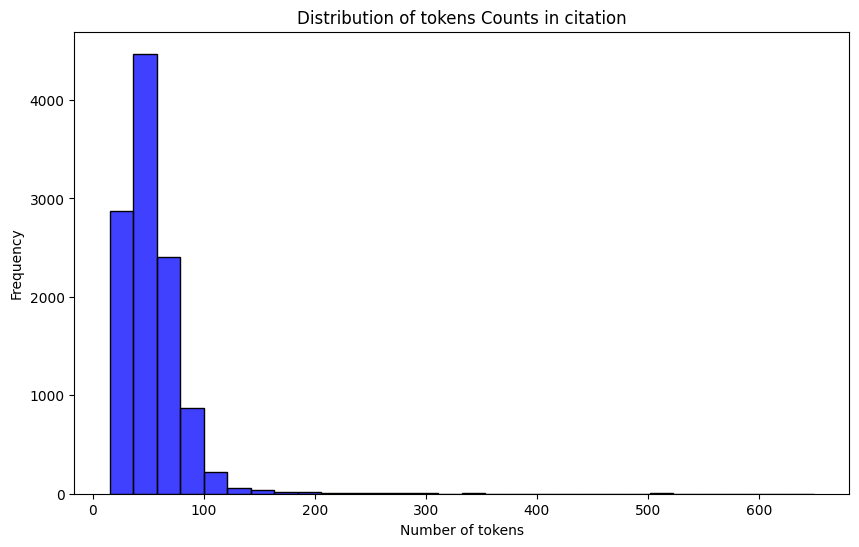

In [19]:
all_scicite['bert_token_cont'] = all_scicite['text'].apply(lambda x: len(tokenizer.encode_plus(x).get('input_ids')))

plt.figure(figsize=(10, 6))
sns.histplot(all_scicite['bert_token_cont'], bins=30, kde=False, color='blue')

plt.xlabel('Number of BERT tokens')
plt.ylabel('Frequency')
plt.title('Distribution of tokens counts in each citation')

plt.show()

In [20]:
all_scicite.bert_token_cont.describe()

count    11020.000000
mean        53.160073
std         28.000599
min         15.000000
25%         36.000000
50%         48.000000
75%         64.000000
max        650.000000
Name: bert_token_cont, dtype: float64

In [17]:
all_scicite.word_count.describe()

count    11020.000000
mean        35.184664
std         19.141842
min         10.000000
25%         24.000000
50%         32.000000
75%         43.000000
max        510.000000
Name: word_count, dtype: float64

In [18]:
df_train.shape, df_test.shape

((8243, 5), (1861, 5))

In [122]:
df_train.to_csv('../data/acl_gan_bert/labeled_scicite.csv', index=False)
df_dev.to_csv('../data/acl_gan_bert/unlabeled_scicite.csv', index=False)
df_test.to_csv('../data/acl_gan_bert/test_scicite.csv', index=False)

In [123]:
df_train.to_csv('../../acl_gan_bert/labeled_scicite.csv', index=False)
df_dev.to_csv('../../acl_gan_bert/unlabeled_scicite.csv', index=False)
df_test.to_csv('../../acl_gan_bert/test_scicite.csv', index=False)